In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
data_file = 'Dataset//car_evaluation.csv'

In [11]:
data = pd.read_csv(data_file, names=['buying', 'maint','doors', 'persons', 'lug_boot', 'safety', 'class'])

In [12]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [13]:
set(data.lug_boot)

{'big', 'med', 'small'}

In [14]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

As the class is unbalanced, we can't use random sampling, preferred method is SMOTE.
Use a Multi-Layer Perceptron. Only balance for trainign dataset. Testing dataset does not need re

<BarContainer object of 4 artists>

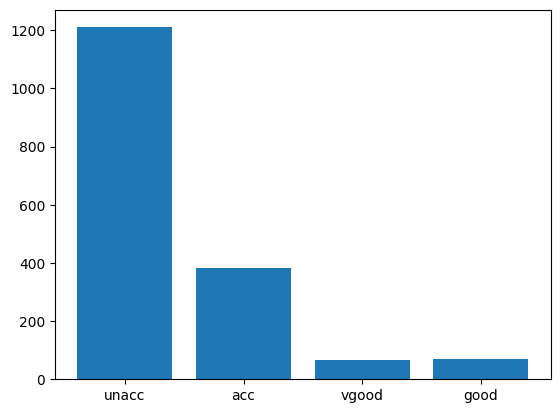

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
counter = Counter(data['class'])
plt.bar(counter.keys(), counter.values())

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
sampler = SMOTE()

In [18]:
for col in data.columns:
    print(col, set(data[col]))

buying {'low', 'high', 'vhigh', 'med'}
maint {'low', 'high', 'vhigh', 'med'}
doors {'2', '3', '4', '5more'}
persons {'more', '2', '4'}
lug_boot {'big', 'small', 'med'}
safety {'high', 'med', 'low'}
class {'good', 'acc', 'unacc', 'vgood'}


In [19]:
data.buying = data.buying.map({'low': 0, 'high': 1, 'med': 2, 'vhigh': 3})
data.maint = data.maint.map({'low': 0, 'high': 1, 'med': 2, 'vhigh': 3})
data.doors = data.doors.map({'5more': 3, '3': 2, '4': 1, '2': 0})
data.persons = data.persons.map({'more': 2, '4': 1, '2': 0})
data.lug_boot = data.lug_boot.map({'small': 0, 'med': 1, 'big': 2})
data.safety = data.safety.map({'low':0, 'med': 1, 'high': 2})


data['class'] = data['class'].map({'vgood': 1, 'unacc': 2, 'acc': 3, 'good': 4})

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
y = data['class']
X = data.drop('class', axis=1)

In [22]:
train_x, test_x, train_y , test_Y = train_test_split(X,y, random_state=42)

In [23]:
rtrain_x, rtrain_y = sampler.fit_resample(train_x, train_y)

<BarContainer object of 4 artists>

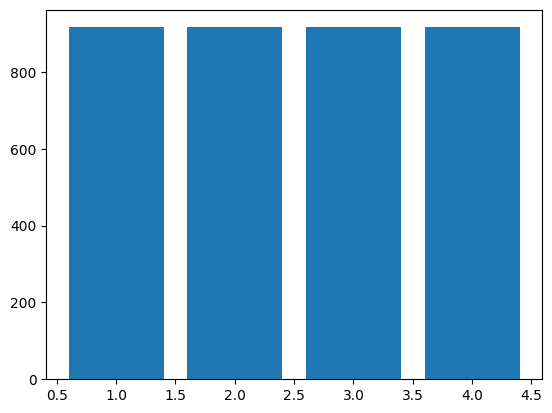

In [24]:
rcount = Counter(rtrain_y)
plt.bar(rcount.keys(), rcount.values())

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
nn = MLPClassifier()

In [27]:
nn.fit(rtrain_x, rtrain_y)

c:\Users\nayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
predicted = nn.predict(test_x)

In [30]:
accuracy_score(predicted, test_Y)

0.8194444444444444